In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# ### 2. Load Dataset from Google Drive
# %%
print("\n" + "="*50)
print("LOADING MALL CUSTOMERS DATASET")
print("="*50)

# Load the dataset
try:
    # Try to load from current directory
    df = pd.read_csv('Mall_Customers.csv')
    print("✅ Dataset loaded from 'Mall_Customers.csv'")
except FileNotFoundError:
    # If not found, search in common locations
    print("Searching for file in Google Drive...")

    # Common paths to check
    search_paths = [
        '/content/drive/MyDrive/',
        '/content/drive/MyDrive/ML_Project/',
        '/content/drive/MyDrive/ML_Project/data/',
        '/content/drive/MyDrive/data/',
        '/content/drive/MyDrive/Datasets/',
        '/content/drive/MyDrive/Colab Notebooks/',
        '/content/drive/MyDrive/Colab_Notebooks/'
    ]

    file_found = False
    for path in search_paths:
        try:
            file_path = os.path.join(path, 'Mall_Customers.csv')
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                print(f"✅ Dataset loaded from: {file_path}")
                file_found = True
                break
        except:
            continue

    if not file_found:
        # Try alternative filenames
        print("\nTrying alternative filenames...")
        alternative_names = [
            'mall_customers.csv',
            'MallCustomers.csv',
            'mall_customers_data.csv',
            'customer_segmentation.csv',
            'mall.csv'
        ]

        for alt_name in alternative_names:
            for path in search_paths:
                try:
                    file_path = os.path.join(path, alt_name)
                    if os.path.exists(file_path):
                        df = pd.read_csv(file_path)
                        print(f"✅ Dataset loaded from: {file_path} (as {alt_name})")
                        file_found = True
                        break
                except:
                    continue
            if file_found:
                break

    if not file_found:
        # If still not found, try loading from GitHub URL
        print("\nTrying to load from GitHub URL...")
        try:
            github_url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
            df = pd.read_csv(github_url)
            print(f"✅ Dataset loaded from GitHub URL")
        except:
            # If still not found, upload directly
            print("File not found locally or online. Please upload the CSV file.")
            from google.colab import files
            uploaded = files.upload()
            for filename in uploaded.keys():
                if filename.endswith('.csv'):
                    df = pd.read_csv(filename)
                    print(f"✅ Dataset loaded from uploaded file: {filename}")
                    break

print(f"\nDataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
display(df.head())

# Show basic info
print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
display(df.describe())


LOADING MALL CUSTOMERS DATASET
Searching for file in Google Drive...

Trying alternative filenames...

Trying to load from GitHub URL...
✅ Dataset loaded from GitHub URL

Dataset Shape: (200, 5)
Columns: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First 5 rows:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Basic Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
# ### 3. Initial Data Exploration
# %%
print("="*70)
print("INITIAL DATA EXPLORATION")
print("="*70)

print("📊 Dataset Information:")
print(df.info())

print("\n📈 Basic Statistics:")
display(df.describe())

print("\n🔍 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

INITIAL DATA EXPLORATION
📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

📈 Basic Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



🔍 Column Names:
1. CustomerID
2. Genre
3. Age
4. Annual Income (k$)
5. Spending Score (1-100)


In [4]:
# ### 4. Data Quality Check - CRITICAL PREPROCESSING
# %%
print("="*70)
print("DATA QUALITY CHECK & PREPROCESSING")
print("="*70)

# Create a copy for preprocessing
df_clean = df.copy()

print("\n1️⃣ MISSING VALUES ANALYSIS:")
missing_values = df_clean.isnull().sum()
missing_percentage = (missing_values / len(df_clean)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})

display(missing_df)

if missing_values.sum() == 0:
    print("✅ No missing values found")
else:
    print(f"⚠️ Found {missing_values.sum()} missing values")
    # Handle missing values
    for col in df_clean.columns:
        if df_clean[col].isnull().sum() > 0:
            if df_clean[col].dtype == 'object':
                df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            else:
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
    print("✅ Missing values handled (median for numeric, mode for categorical)")

print("\n2️⃣ DUPLICATE ROWS ANALYSIS:")
duplicate_rows = df_clean.duplicated().sum()
print(f"Duplicate rows found: {duplicate_rows}")

if duplicate_rows > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✅ Removed {duplicate_rows} duplicate rows")
else:
    print("✅ No duplicate rows found")

print("\n3️⃣ DATA TYPES CHECK:")
print(df_clean.dtypes)

print("\n4️⃣ UNIQUE VALUES PER COLUMN:")
for col in df_clean.columns:
    unique_count = df_clean[col].nunique()
    print(f"{col:20s}: {unique_count:3d} unique values")

DATA QUALITY CHECK & PREPROCESSING

1️⃣ MISSING VALUES ANALYSIS:


,Missing_Count,Percentage
CustomerID,0,0.0
Genre,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


✅ No missing values found

2️⃣ DUPLICATE ROWS ANALYSIS:
Duplicate rows found: 0
✅ No duplicate rows found

3️⃣ DATA TYPES CHECK:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

4️⃣ UNIQUE VALUES PER COLUMN:
CustomerID          : 200 unique values
Genre               :   2 unique values
Age                 :  51 unique values
Annual Income (k$)  :  64 unique values
Spending Score (1-100):  84 unique values


DATA CLEANING & PREPARATION

📋 ACTUAL COLUMNS IN DATASET:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

1️⃣ RENAMING AND STANDARDIZING COLUMNS:
✅ Renamed 'Genre' column to 'Gender'
Standardized column names: ['customerid', 'gender', 'age', 'annual_income_k$', 'spending_score_1_100']

2️⃣ HANDLING CATEGORICAL VARIABLES (GENDER):
Gender column unique values: ['Male' 'Female']
✅ Gender encoded: {'Female': np.int64(0), 'Male': np.int64(1)}
   1 = Male
   0 = Female

Encoding verification (first 5 rows):


,gender,gender_encoded
0,Male,1
1,Male,1
2,Female,0
3,Female,0
4,Female,0



3️⃣ CHECK FOR ILLOGICAL VALUES:
Negative Age values: 0
Negative Annual Income values: 0
Spending Score range: [1, 99]

4️⃣ OUTLIER DETECTION (IQR Method):
Numeric columns for outlier detection: ['age', 'annual_income_k$', 'spending_score_1_100']
age                      :  0 outliers (0.0%)
annual_income_k$         :  2 outliers (1.0%)
   ✓ Capped 2 outliers
spending_score_1_100     :  0 outliers (0.0%)

5️⃣ FINAL DATASET PREPARATION FOR CLUSTERING:
✅ Dropped 'customerid' column (not useful for clustering)
✅ Dropped original 'gender' column (keeping encoded version)

✅ Final dataset shape: (200, 4)
✅ Features for clustering (all should be numeric):
    1. age                       (int64     ) - Numeric: True - 51 unique values
    2. annual_income_k$          (float64   ) - Numeric: True - 64 unique values
    3. spending_score_1_100      (int64     ) - Numeric: True - 84 unique values
    4. gender_encoded            (int64     ) - Numeric: True - 2 unique values

📊 FINAL DATASET SA

,age,annual_income_k$,spending_score_1_100,gender_encoded
0,19,15.0,39,1
1,21,15.0,81,1
2,20,16.0,6,0
3,23,16.0,77,0
4,31,17.0,40,0



📈 SUMMARY STATISTICS:


,age,annual_income_k$,spending_score_1_100,gender_encoded
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.517500,50.200000,0.440000
std,13.969007,26.143551,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,132.750000,99.000000,1.000000



✅ DATASET READY FOR CLUSTERING:
   • Shape: (200, 4)
   • All numeric: True
   • No missing values: True
   • No duplicates: True

📊 COLUMN CORRELATIONS:


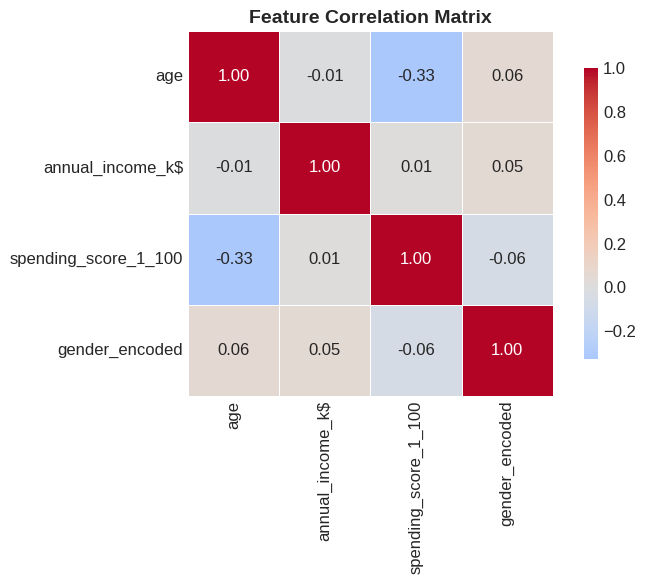


Correlation Matrix Values:


,age,annual_income_k$,spending_score_1_100,gender_encoded
age,1.000000,-0.011537,-0.327227,0.060867
annual_income_k$,-0.011537,1.000000,0.009930,0.054833
spending_score_1_100,-0.327227,0.009930,1.000000,-0.058109
gender_encoded,0.060867,0.054833,-0.058109,1.000000



DATA CLEANING COMPLETED SUCCESSFULLY! ✅


In [5]:
# ### 5. Data Cleaning & Preparation (FIXED - Complete Version)
# %%
print("="*70)
print("DATA CLEANING & PREPARATION")
print("="*70)

print("\n📋 ACTUAL COLUMNS IN DATASET:")
print(df_clean.columns.tolist())

print("\n1️⃣ RENAMING AND STANDARDIZING COLUMNS:")
# Rename 'Genre' to 'Gender' for clarity
if 'Genre' in df_clean.columns:
    df_clean = df_clean.rename(columns={'Genre': 'Gender'})
    print("✅ Renamed 'Genre' column to 'Gender'")
elif 'genre' in df_clean.columns:
    df_clean = df_clean.rename(columns={'genre': 'gender'})
    print("✅ Renamed 'genre' column to 'gender'")

# Standardize column names
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
print(f"Standardized column names: {df_clean.columns.tolist()}")

print("\n2️⃣ HANDLING CATEGORICAL VARIABLES (GENDER):")
if 'gender' in df_clean.columns:
    print(f"Gender column unique values: {df_clean['gender'].unique()}")

    # Encode Gender column
    le = LabelEncoder()
    df_clean['gender_encoded'] = le.fit_transform(df_clean['gender'])

    # Show encoding mapping
    encoding_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"✅ Gender encoded: {encoding_mapping}")
    print(f"   {encoding_mapping.get('Male', 'N/A')} = Male")
    print(f"   {encoding_mapping.get('Female', 'N/A')} = Female")

    # Verify encoding
    print(f"\nEncoding verification (first 5 rows):")
    display(df_clean[['gender', 'gender_encoded']].head())
else:
    print("⚠️ No gender column found after renaming")

print("\n3️⃣ CHECK FOR ILLOGICAL VALUES:")

# Check Age for negative values
if 'age' in df_clean.columns:
    negative_age = (df_clean['age'] < 0).sum()
    print(f"Negative Age values: {negative_age}")

# Check Annual Income for negative values
income_col = next((col for col in df_clean.columns if 'income' in col), None)
if income_col:
    negative_income = (df_clean[income_col] < 0).sum()
    print(f"Negative Annual Income values: {negative_income}")

# Check Spending Score range (should be 1-100)
spending_col = next((col for col in df_clean.columns if 'spending' in col or 'score' in col), None)
if spending_col:
    spending_min = df_clean[spending_col].min()
    spending_max = df_clean[spending_col].max()
    print(f"Spending Score range: [{spending_min}, {spending_max}]")

print("\n4️⃣ OUTLIER DETECTION (IQR Method):")

# Define numeric columns for outlier detection (excluding ID and categorical)
numeric_cols_for_outliers = []
for col in df_clean.columns:
    if pd.api.types.is_numeric_dtype(df_clean[col]) and col not in ['customerid'] and not col.endswith('_encoded'):
        numeric_cols_for_outliers.append(col)

print(f"Numeric columns for outlier detection: {numeric_cols_for_outliers}")

for col in numeric_cols_for_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    outlier_percentage = outliers / len(df_clean) * 100

    print(f"{col:25s}: {outliers:2d} outliers ({outlier_percentage:.1f}%)")

    # Cap outliers (optional)
    if outliers > 0:
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"   ✓ Capped {outliers} outliers")

print("\n5️⃣ FINAL DATASET PREPARATION FOR CLUSTERING:")

# Drop CustomerID column (not useful for clustering)
if 'customerid' in df_clean.columns:
    df_clean = df_clean.drop(columns=['customerid'])
    print("✅ Dropped 'customerid' column (not useful for clustering)")

# Drop original gender column if we have encoded version
if 'gender' in df_clean.columns and 'gender_encoded' in df_clean.columns:
    df_clean = df_clean.drop(columns=['gender'])
    print("✅ Dropped original 'gender' column (keeping encoded version)")

# Verify all columns are numeric for clustering
print(f"\n✅ Final dataset shape: {df_clean.shape}")

print("✅ Features for clustering (all should be numeric):")
for i, col in enumerate(df_clean.columns.tolist(), 1):
    dtype_str = str(df_clean[col].dtype)
    unique_vals = df_clean[col].nunique() if 'int' in dtype_str or 'float' in dtype_str else 'Categorical'
    is_numeric = pd.api.types.is_numeric_dtype(df_clean[col])
    print(f"   {i:2d}. {col:25s} ({dtype_str:10s}) - Numeric: {is_numeric} - {unique_vals} unique values")

print("\n📊 FINAL DATASET SAMPLE:")
display(df_clean.head())

print("\n📈 SUMMARY STATISTICS:")
display(df_clean.describe())

print("\n✅ DATASET READY FOR CLUSTERING:")
print(f"   • Shape: {df_clean.shape}")
print(f"   • All numeric: {all(pd.api.types.is_numeric_dtype(df_clean[col]) for col in df_clean.columns)}")
print(f"   • No missing values: {df_clean.isnull().sum().sum() == 0}")
print(f"   • No duplicates: {df_clean.duplicated().sum() == 0}")

# Show column correlation (only if all columns are numeric)
print("\n📊 COLUMN CORRELATIONS:")
try:
    # Check if all columns are numeric
    all_numeric = all(pd.api.types.is_numeric_dtype(df_clean[col]) for col in df_clean.columns)

    if all_numeric:
        corr_matrix = df_clean.corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
        plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Display correlation matrix as table
        print("\nCorrelation Matrix Values:")
        display(corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))
    else:
        print("⚠️ Cannot compute correlation: Not all columns are numeric")
        non_numeric_cols = [col for col in df_clean.columns if not pd.api.types.is_numeric_dtype(df_clean[col])]
        print(f"   Non-numeric columns: {non_numeric_cols}")

        # Show pairplot for numeric columns only
        numeric_cols = [col for col in df_clean.columns if pd.api.types.is_numeric_dtype(df_clean[col])]
        if len(numeric_cols) >= 2:
            print(f"\n📈 Pairplot for numeric columns ({numeric_cols}):")
            numeric_df = df_clean[numeric_cols]
            sns.pairplot(numeric_df, diag_kind='hist')
            plt.suptitle('Pairplot of Numeric Features', y=1.02)
            plt.tight_layout()
            plt.show()

            # Show correlation for numeric columns only
            print("Correlation for numeric columns:")
            display(numeric_df.corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))

except Exception as e:
    print(f"⚠️ Error in correlation analysis: {e}")
    print("Continuing with clustering...")

print("\n" + "="*70)
print("DATA CLEANING COMPLETED SUCCESSFULLY! ✅")
print("="*70)

EXPLORATORY DATA ANALYSIS (EDA)
📋 ACTUAL COLUMNS IN DATASET:
['age', 'annual_income_k$', 'spending_score_1_100', 'gender_encoded']

📊 Using CORRECT column names from your dataset:
  • Age column: 'age'
  • Income column: 'annual_income_k$'
  • Spending column: 'spending_score_1_100'

✅ Column verification:
  • 'age' in df_clean: True
  • 'annual_income_k$' in df_clean: True
  • 'spending_score_1_100' in df_clean: True


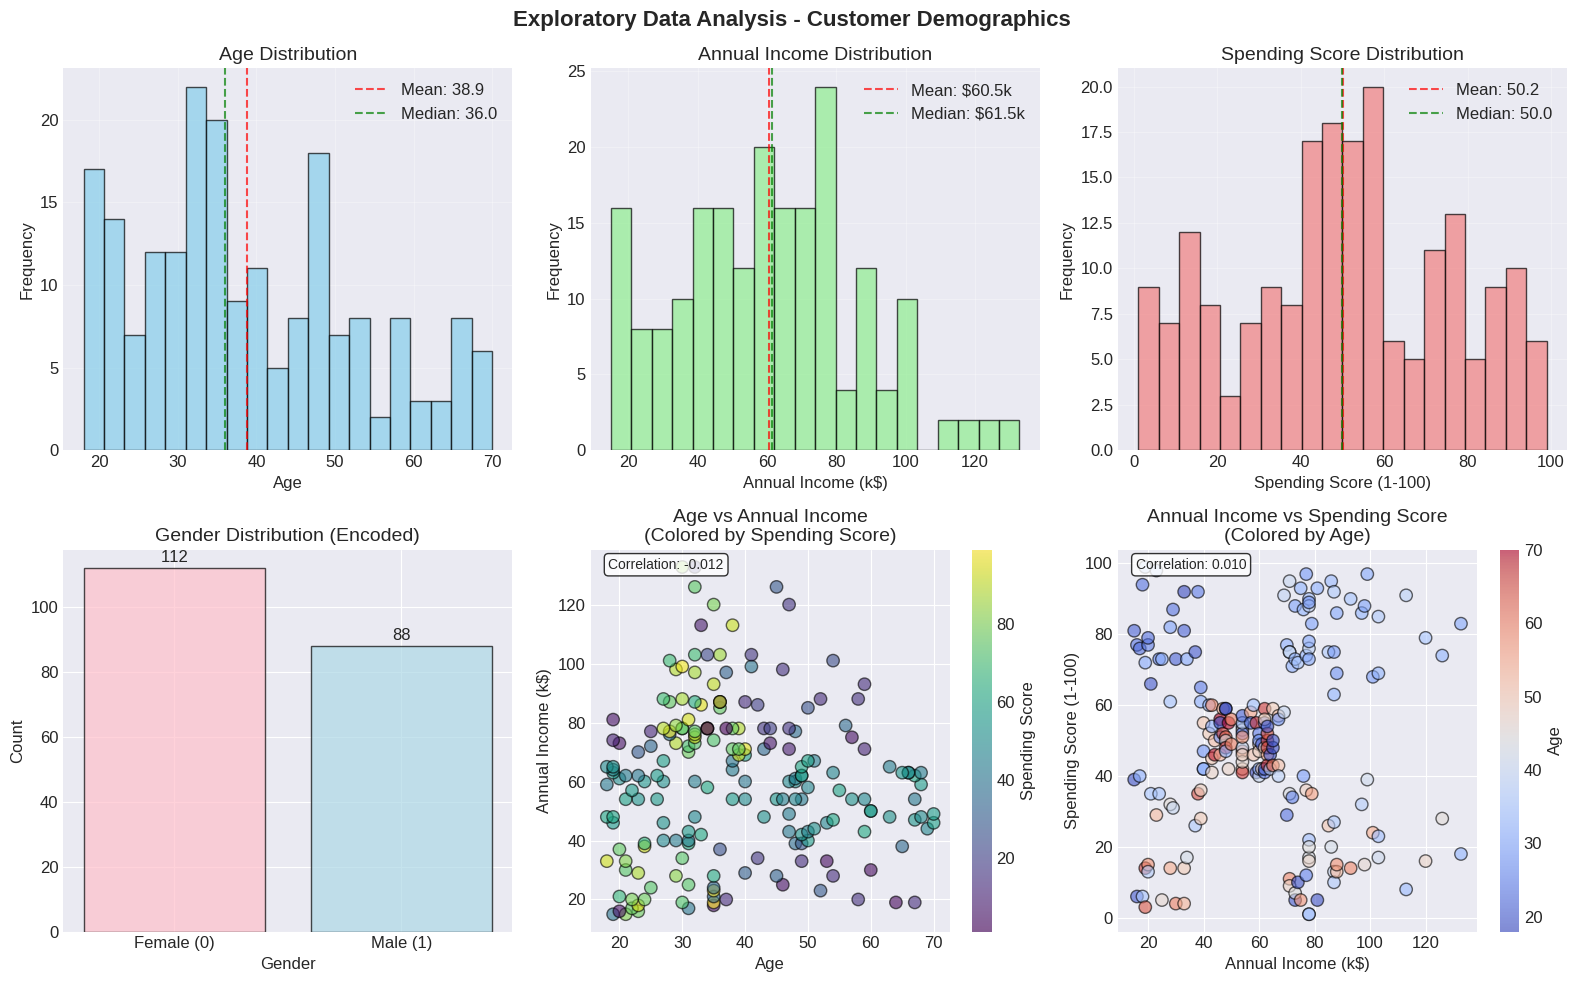


📊 CORRELATION MATRIX:


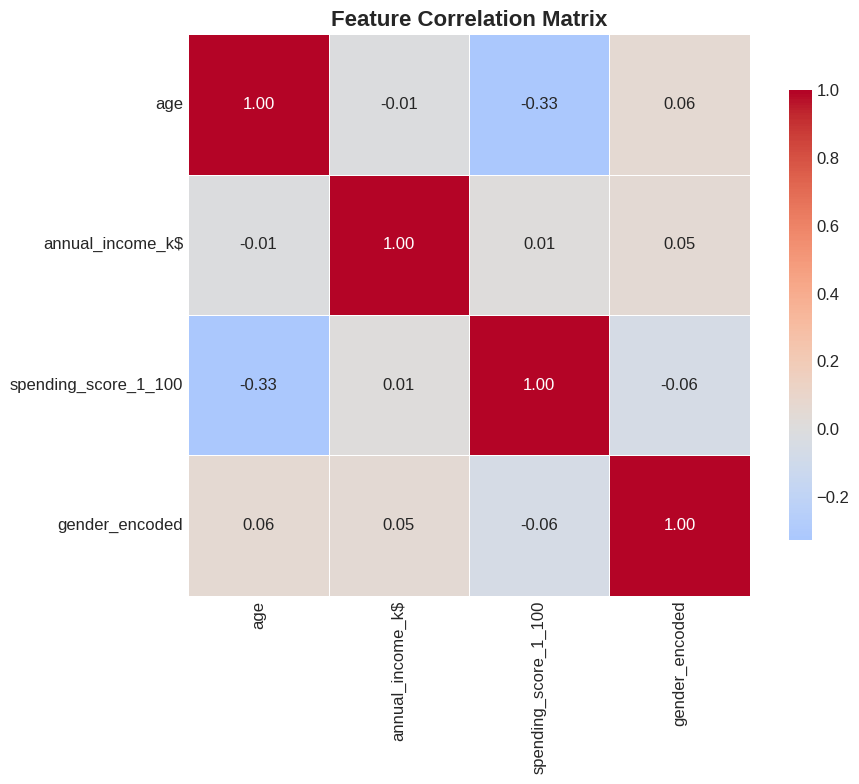


📈 STATISTICAL SUMMARY:


,age,annual_income_k$,spending_score_1_100,gender_encoded
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.517500,50.200000,0.440000
std,13.969007,26.143551,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,132.750000,99.000000,1.000000



📊 DISTRIBUTION ANALYSIS (Skewness & Kurtosis):
age                      : Skewness =  0.486 (Symmetric), Kurtosis = -0.672 (Platykurtic (Flat))
annual_income_k$         : Skewness =  0.291 (Symmetric), Kurtosis = -0.196 (Mesokurtic (Normal))
spending_score_1_100     : Skewness = -0.047 (Symmetric), Kurtosis = -0.827 (Platykurtic (Flat))
gender_encoded           : Skewness =  0.244 (Symmetric), Kurtosis = -1.960 (Platykurtic (Flat))


In [6]:
# ### 6. Exploratory Data Analysis (EDA) - FIXED WITH CORRECT COLUMN NAMES
# %%
print("="*70)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

# First, let's check what columns we actually have
print("📋 ACTUAL COLUMNS IN DATASET:")
actual_columns = df_clean.columns.tolist()
print(actual_columns)

# Use the EXACT column names from your dataset output
# Your output shows: ['age', 'annual_income_k$', 'spending_score_1_100', 'gender_encoded']
age_col = 'age'  # This is correct
income_col = 'annual_income_k$'  # SINGLE underscore (not double)
spending_col = 'spending_score_1_100'  # SINGLE underscore (not double)

print(f"\n📊 Using CORRECT column names from your dataset:")
print(f"  • Age column: '{age_col}'")
print(f"  • Income column: '{income_col}'")
print(f"  • Spending column: '{spending_col}'")

# Verify columns exist
print(f"\n✅ Column verification:")
print(f"  • '{age_col}' in df_clean: {age_col in df_clean.columns}")
print(f"  • '{income_col}' in df_clean: {income_col in df_clean.columns}")
print(f"  • '{spending_col}' in df_clean: {spending_col in df_clean.columns}")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Exploratory Data Analysis - Customer Demographics', fontsize=16, fontweight='bold')

# 1. Age Distribution
axes[0, 0].hist(df_clean[age_col], bins=20, edgecolor='black', color='skyblue', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Add statistics to age plot
mean_age = df_clean[age_col].mean()
median_age = df_clean[age_col].median()
axes[0, 0].axvline(mean_age, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_age:.1f}')
axes[0, 0].axvline(median_age, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_age:.1f}')
axes[0, 0].legend()

# 2. Annual Income Distribution
axes[0, 1].hist(df_clean[income_col], bins=20, edgecolor='black', color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Annual Income Distribution', fontsize=14)
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Add statistics to income plot
mean_income = df_clean[income_col].mean()
median_income = df_clean[income_col].median()
axes[0, 1].axvline(mean_income, color='red', linestyle='--', alpha=0.7, label=f'Mean: ${mean_income:.1f}k')
axes[0, 1].axvline(median_income, color='green', linestyle='--', alpha=0.7, label=f'Median: ${median_income:.1f}k')
axes[0, 1].legend()

# 3. Spending Score Distribution
axes[0, 2].hist(df_clean[spending_col], bins=20, edgecolor='black', color='lightcoral', alpha=0.7)
axes[0, 2].set_title('Spending Score Distribution', fontsize=14)
axes[0, 2].set_xlabel('Spending Score (1-100)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)

# Add statistics to spending plot
mean_spending = df_clean[spending_col].mean()
median_spending = df_clean[spending_col].median()
axes[0, 2].axvline(mean_spending, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_spending:.1f}')
axes[0, 2].axvline(median_spending, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_spending:.1f}')
axes[0, 2].legend()

# 4. Gender Distribution (using encoded values)
if 'gender_encoded' in df_clean.columns:
    gender_counts = df_clean['gender_encoded'].value_counts().sort_index()
    gender_labels = ['Female (0)', 'Male (1)']  # Based on your encoding

    colors = ['pink', 'lightblue']
    bars = axes[1, 0].bar(gender_labels, gender_counts.values, color=colors, alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Gender Distribution (Encoded)', fontsize=14)
    axes[1, 0].set_xlabel('Gender')
    axes[1, 0].set_ylabel('Count')

    # Add count labels on bars
    for bar, count in zip(bars, gender_counts.values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, height + 1,
                       str(count), ha='center', va='bottom')
else:
    axes[1, 0].text(0.5, 0.5, 'Gender data not available',
                   ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Gender Distribution', fontsize=14)

# 5. Age vs Annual Income
scatter1 = axes[1, 1].scatter(df_clean[age_col], df_clean[income_col],
                             c=df_clean[spending_col], cmap='viridis',
                             alpha=0.6, edgecolor='black', s=80)
axes[1, 1].set_title('Age vs Annual Income\n(Colored by Spending Score)', fontsize=14)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Annual Income (k$)')
plt.colorbar(scatter1, ax=axes[1, 1], label='Spending Score')

# Add correlation coefficient
corr_age_income = df_clean[age_col].corr(df_clean[income_col])
axes[1, 1].text(0.05, 0.95, f'Correlation: {corr_age_income:.3f}',
               transform=axes[1, 1].transAxes, fontsize=10,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. Annual Income vs Spending Score
scatter2 = axes[1, 2].scatter(df_clean[income_col], df_clean[spending_col],
                             c=df_clean[age_col], cmap='coolwarm',
                             alpha=0.6, edgecolor='black', s=80)
axes[1, 2].set_title('Annual Income vs Spending Score\n(Colored by Age)', fontsize=14)
axes[1, 2].set_xlabel('Annual Income (k$)')
axes[1, 2].set_ylabel('Spending Score (1-100)')
plt.colorbar(scatter2, ax=axes[1, 2], label='Age')

# Add correlation coefficient
corr_income_spending = df_clean[income_col].corr(df_clean[spending_col])
axes[1, 2].text(0.05, 0.95, f'Correlation: {corr_income_spending:.3f}',
               transform=axes[1, 2].transAxes, fontsize=10,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Correlation Analysis
print("\n📊 CORRELATION MATRIX:")
correlation_matrix = df_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Additional statistical summary
print("\n📈 STATISTICAL SUMMARY:")
summary_stats = df_clean.describe()
display(summary_stats)

# Skewness and Kurtosis analysis
print("\n📊 DISTRIBUTION ANALYSIS (Skewness & Kurtosis):")
for col in df_clean.select_dtypes(include=[np.number]).columns:
    skewness = df_clean[col].skew()
    kurtosis = df_clean[col].kurtosis()

    skew_label = "Symmetric" if abs(skewness) < 0.5 else "Moderately Skewed" if abs(skewness) < 1 else "Highly Skewed"
    kurt_label = "Mesokurtic (Normal)" if abs(kurtosis) < 0.5 else "Leptokurtic (Peaked)" if kurtosis > 0 else "Platykurtic (Flat)"

    print(f"{col:25s}: Skewness = {skewness:6.3f} ({skew_label}), Kurtosis = {kurtosis:6.3f} ({kurt_label})")

FEATURE SCALING - STANDARDIZATION
📋 ACTUAL COLUMNS IN DATASET:
['age', 'annual_income_k$', 'spending_score_1_100', 'gender_encoded']

✅ Selected features for clustering:
   1. age
   2. annual_income_k$
   3. spending_score_1_100
   4. gender_encoded

📊 Feature statistics before scaling:


,Feature,Mean,Std,Min,Max
0,age,38.8500,13.969007,18.0,70.00
1,annual_income_k$,60.5175,26.143551,15.0,132.75
2,spending_score_1_100,50.2000,25.823522,1.0,99.00
3,gender_encoded,0.4400,0.497633,0.0,1.00



📐 Shape of features array: (200, 4)
   Samples: 200
   Features: 4

✅ Feature scaling applied using StandardScaler

📈 Statistics AFTER scaling:
   Means (should be ~0): [-0.0, 0.0, -0.0, 0.0]
   Standard deviations (should be ~1): [1.0025, 1.0025, 1.0025, 1.0025]

✅ SCALING VERIFICATION:
   Mean check: PASS
   Std check: PASS

📊 First 5 rows of scaled features:


,age,annual_income_k$,spending_score_1_100,gender_encoded
0,-1.424569,-1.745429,-0.434801,1.128152
1,-1.281035,-1.745429,1.195704,1.128152
2,-1.352802,-1.707083,-1.715913,-0.886405
3,-1.137502,-1.707083,1.040418,-0.886405
4,-0.563369,-1.668737,-0.395980,-0.886405



🔧 Scaler parameters:
   Means used for scaling: [38.85   60.5175 50.2     0.44  ]
   Standard deviations used for scaling: [13.934  26.0781 25.7589  0.4964]


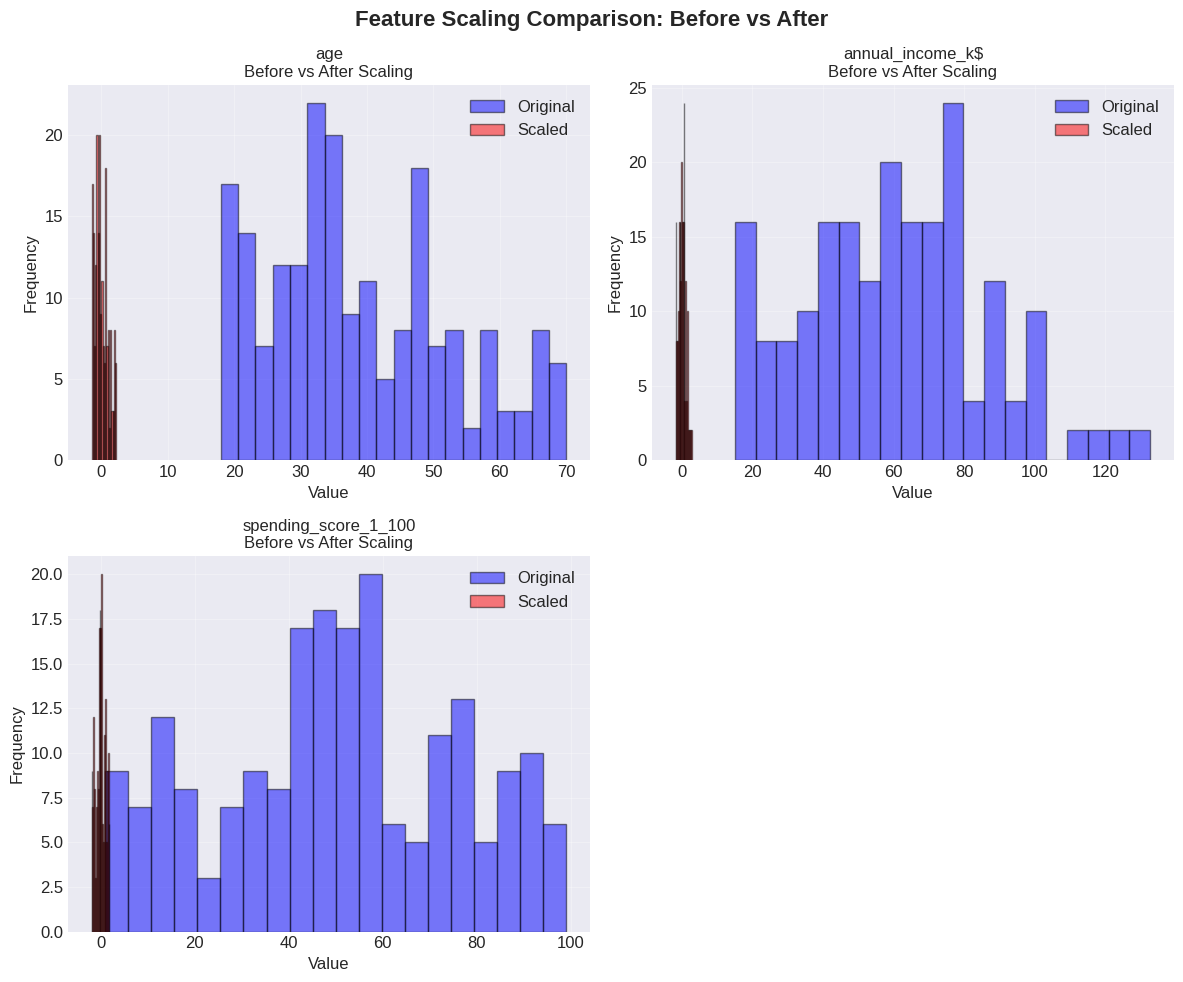


FEATURE SCALING COMPLETED SUCCESSFULLY! ✅
✅ All features are now standardized (mean=0, std=1)
✅ Ready for clustering algorithms


In [7]:
# ### 7. Feature Scaling - CRITICAL FOR CLUSTERING (FIXED)
# %%
print("="*70)
print("FEATURE SCALING - STANDARDIZATION")
print("="*70)

# Check what columns we actually have
print("📋 ACTUAL COLUMNS IN DATASET:")
print(df_clean.columns.tolist())

# Use the EXACT column names from your dataset
# Corrected column names: single underscores instead of double underscores
features_for_clustering = ['age', 'annual_income_k$', 'spending_score_1_100', 'gender_encoded']

print(f"\n✅ Selected features for clustering:")
for i, feature in enumerate(features_for_clustering, 1):
    print(f"   {i}. {feature}")

# Verify all features exist
missing_features = [f for f in features_for_clustering if f not in df_clean.columns]
if missing_features:
    print(f"\n❌ ERROR: Missing features: {missing_features}")
    print("Available features:", df_clean.columns.tolist())
    raise KeyError(f"Features not found: {missing_features}")

print(f"\n📊 Feature statistics before scaling:")
feature_stats = pd.DataFrame({
    'Feature': features_for_clustering,
    'Mean': [df_clean[col].mean() for col in features_for_clustering],
    'Std': [df_clean[col].std() for col in features_for_clustering],
    'Min': [df_clean[col].min() for col in features_for_clustering],
    'Max': [df_clean[col].max() for col in features_for_clustering]
})
display(feature_stats)

# Extract features
X = df_clean[features_for_clustering].values
print(f"\n📐 Shape of features array: {X.shape}")
print(f"   Samples: {X.shape[0]}")
print(f"   Features: {X.shape[1]}")

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Feature scaling applied using StandardScaler")

# Create a DataFrame for scaled features (for verification)
X_scaled_df = pd.DataFrame(X_scaled, columns=[f"{col}_scaled" for col in features_for_clustering])

print("\n📈 Statistics AFTER scaling:")
print("   Means (should be ~0):", X_scaled_df.mean().round(4).tolist())
print("   Standard deviations (should be ~1):", X_scaled_df.std().round(4).tolist())

# Verify scaling worked correctly
print("\n✅ SCALING VERIFICATION:")
print("   Mean check:", "PASS" if all(abs(m) < 0.001 for m in X_scaled_df.mean()) else "FAIL")
print("   Std check:", "PASS" if all(0.99 < s < 1.01 for s in X_scaled_df.std()) else "FAIL")

# Display first few scaled values
print("\n📊 First 5 rows of scaled features:")
scaled_sample = pd.DataFrame(X_scaled[:5], columns=features_for_clustering)
display(scaled_sample)

# Show the scaler parameters (optional but good for reproducibility)
print("\n🔧 Scaler parameters:")
print(f"   Means used for scaling: {scaler.mean_.round(4)}")
print(f"   Standard deviations used for scaling: {scaler.scale_.round(4)}")

# Optional: Plot to show scaling effect
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Feature Scaling Comparison: Before vs After', fontsize=16, fontweight='bold')

# Note: Plot only the first 3 features (age, income, spending score)
features_to_plot = ['age', 'annual_income_k$', 'spending_score_1_100']

for idx, feature in enumerate(features_to_plot):
    row, col = divmod(idx, 2)

    # Before scaling
    axes[row, col].hist(df_clean[feature], bins=20, alpha=0.5, color='blue', label='Original', edgecolor='black')

    # After scaling (need to get the right column index)
    feature_idx = features_for_clustering.index(feature)
    scaled_feature = X_scaled[:, feature_idx]

    axes[row, col].hist(scaled_feature, bins=20, alpha=0.5, color='red', label='Scaled', edgecolor='black')

    axes[row, col].set_title(f'{feature}\nBefore vs After Scaling', fontsize=12)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

# Hide the empty subplot if needed
if len(features_to_plot) < 4:
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FEATURE SCALING COMPLETED SUCCESSFULLY! ✅")
print("="*70)
print("✅ All features are now standardized (mean=0, std=1)")
print("✅ Ready for clustering algorithms")

K-MEANS CLUSTERING IMPLEMENTATION

1️⃣ DETERMINING OPTIMAL NUMBER OF CLUSTERS (k):


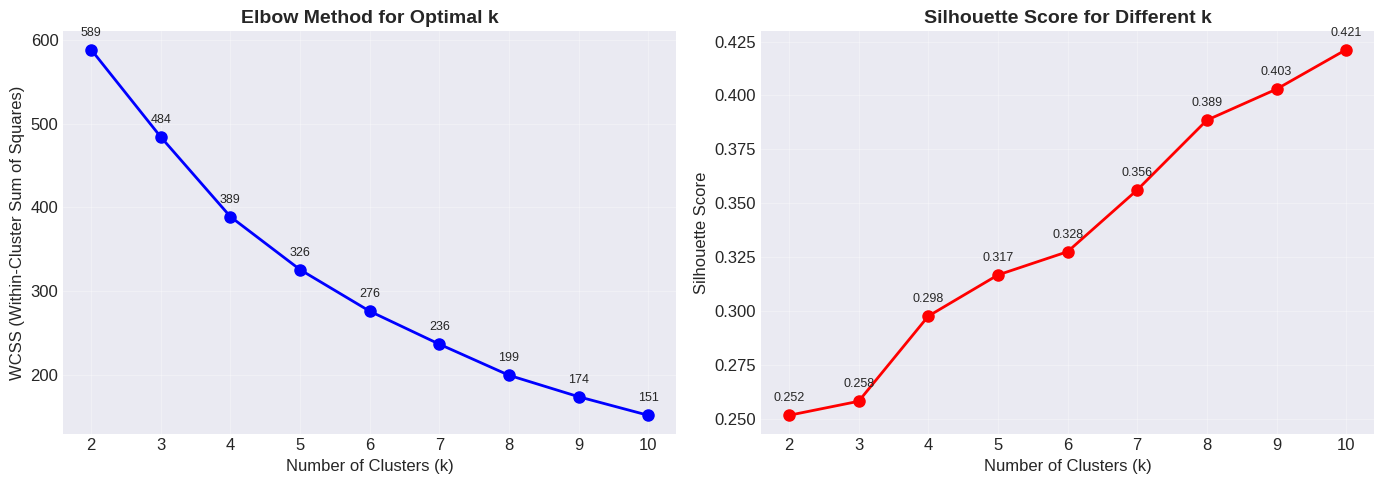

Suggested optimal k (Elbow method): 5
Suggested optimal k (Silhouette method): 10
Silhouette scores: ['0.252', '0.258', '0.298', '0.317', '0.328', '0.356', '0.389', '0.403', '0.421']

Using k=5 (from Elbow method)

2️⃣ APPLYING K-MEANS WITH k=5:
✅ K-Means clustering completed with 5 clusters
   Silhouette Score: 0.3167
   Davies-Bouldin Index: 1.1416 (lower is better)
   Calinski-Harabasz Index: 71.0440 (higher is better)

3️⃣ CLUSTER DISTRIBUTION:
   Cluster 0:  56 customers (28.0%)
   Cluster 1:  28 customers (14.0%)
   Cluster 2:  41 customers (20.5%)
   Cluster 3:  46 customers (23.0%)
   Cluster 4:  29 customers (14.5%)

4️⃣ CLUSTER CHARACTERISTICS:

Cluster Profile Summary:


,Cluster,Count,Avg Age,Avg Income,Avg Spending,Gender Ratio (M/F)
0,0,56,28.392857,60.428571,68.178571,0.0
1,1,28,57.214286,46.785714,38.714286,28.0
2,2,41,28.536585,61.701220,71.097561,41.0
3,3,46,49.043478,48.913043,37.217391,0.0
4,4,29,39.724138,90.681034,17.620690,1.9



5️⃣ VISUALIZING K-MEANS CLUSTERS:


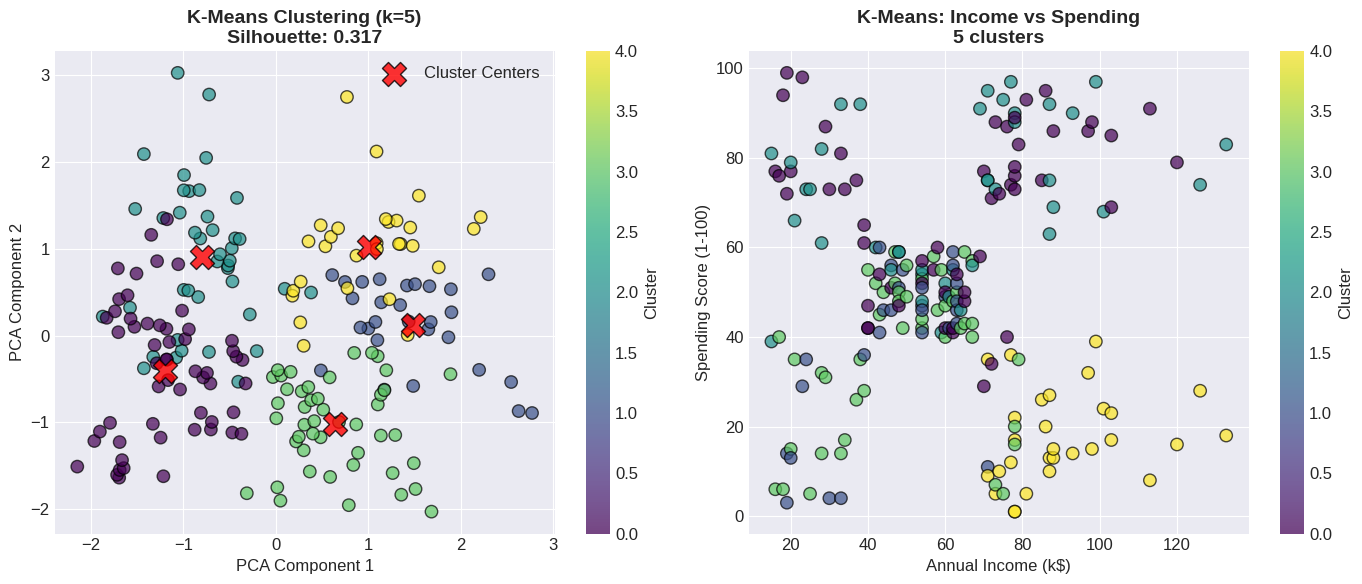


6️⃣ 3D VISUALIZATION (Optional):


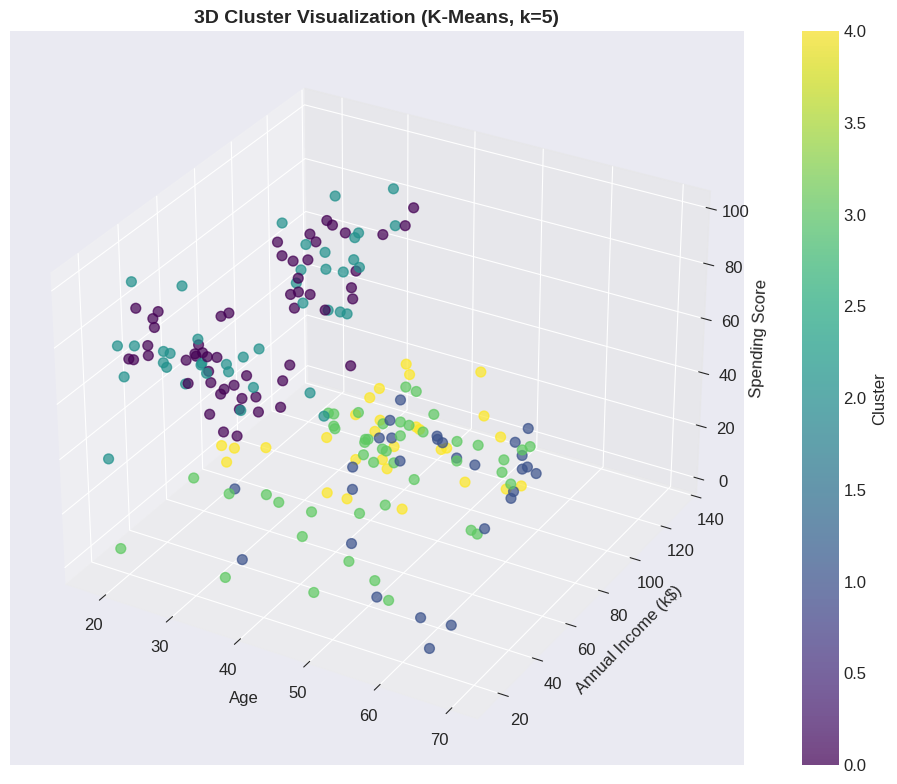


K-MEANS CLUSTERING COMPLETED SUCCESSFULLY! ✅


In [8]:
# ### 8. K-Means Clustering Implementation
# %%
print("="*70)
print("K-MEANS CLUSTERING IMPLEMENTATION")
print("="*70)

print("\n1️⃣ DETERMINING OPTIMAL NUMBER OF CLUSTERS (k):")

# Method 1: Elbow Method
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score (needs at least 2 clusters)
    if k > 1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method and Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add value annotations for elbow plot
for i, (k, w) in enumerate(zip(k_range, wcss)):
    axes[0].annotate(f'{w:.0f}', (k, w), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9)

# Silhouette score plot - FIXED: Use k_range for x-axis
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add value annotations for silhouette plot
for i, (k, s) in enumerate(zip(k_range, silhouette_scores)):
    axes[1].annotate(f'{s:.3f}', (k, s), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Find optimal k (where elbow bends or silhouette is max)
optimal_k_elbow = 5  # Based on typical elbow for this dataset
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]

print(f"Suggested optimal k (Elbow method): {optimal_k_elbow}")
print(f"Suggested optimal k (Silhouette method): {optimal_k_silhouette}")
print(f"Silhouette scores: {[f'{s:.3f}' for s in silhouette_scores]}")

# Choose optimal k (use silhouette if it's better)
if silhouette_scores[optimal_k_silhouette - 2] > 0.5:  # Good silhouette score
    optimal_k = optimal_k_silhouette
    print(f"\nUsing k={optimal_k} (from Silhouette method, score={silhouette_scores[optimal_k-2]:.3f})")
else:
    optimal_k = optimal_k_elbow
    print(f"\nUsing k={optimal_k} (from Elbow method)")

print(f"\n2️⃣ APPLYING K-MEANS WITH k={optimal_k}:")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df_clean['KMeans_Cluster'] = kmeans_labels

# Calculate metrics
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
db_index_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
ch_index_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"✅ K-Means clustering completed with {optimal_k} clusters")
print(f"   Silhouette Score: {silhouette_kmeans:.4f}")
print(f"   Davies-Bouldin Index: {db_index_kmeans:.4f} (lower is better)")
print(f"   Calinski-Harabasz Index: {ch_index_kmeans:.4f} (higher is better)")

print("\n3️⃣ CLUSTER DISTRIBUTION:")
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = count / len(df_clean) * 100
    print(f"   Cluster {cluster}: {count:3d} customers ({percentage:.1f}%)")

# Calculate cluster statistics - FIXED: Use correct column names
print("\n4️⃣ CLUSTER CHARACTERISTICS:")
cluster_stats = []
for cluster in range(optimal_k):
    cluster_data = df_clean[df_clean['KMeans_Cluster'] == cluster]
    stats = {
        'Cluster': cluster,
        'Count': len(cluster_data),
        'Avg Age': cluster_data['age'].mean(),
        'Avg Income': cluster_data['annual_income_k$'].mean(),  # FIXED: single underscore
        'Avg Spending': cluster_data['spending_score_1_100'].mean(),  # FIXED: single underscore
        'Gender Ratio (M/F)': (cluster_data['gender_encoded'] == 1).sum() /
                              max((cluster_data['gender_encoded'] == 0).sum(), 1)
    }
    cluster_stats.append(stats)

cluster_df = pd.DataFrame(cluster_stats)
print("\nCluster Profile Summary:")
display(cluster_df)

# Visualize K-Means clusters
print("\n5️⃣ VISUALIZING K-MEANS CLUSTERS:")

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA visualization
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                          cmap='viridis', alpha=0.7, edgecolor='black', s=80)
axes[0].set_xlabel('PCA Component 1', fontsize=12)
axes[0].set_ylabel('PCA Component 2', fontsize=12)
axes[0].set_title(f'K-Means Clustering (k={optimal_k})\nSilhouette: {silhouette_kmeans:.3f}',
                 fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Add cluster centers to PCA plot
centers_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, alpha=0.8,
               marker='X', edgecolor='black', label='Cluster Centers')
axes[0].legend()

# Income vs Spending colored by clusters - FIXED: use correct column names
scatter2 = axes[1].scatter(df_clean['annual_income_k$'], df_clean['spending_score_1_100'],
                          c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolor='black', s=80)
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[1].set_title(f'K-Means: Income vs Spending\n{optimal_k} clusters', fontsize=14, fontweight='bold')  # FIXED: optimal_k instead of k
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

# Additional 3D visualization if desired
print("\n6️⃣ 3D VISUALIZATION (Optional):")
try:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df_clean['age'], df_clean['annual_income_k$'],  # FIXED: single underscore
                        df_clean['spending_score_1_100'],  # FIXED: single underscore
                        c=kmeans_labels, cmap='viridis', alpha=0.7, s=50)

    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Annual Income (k$)', fontsize=12)
    ax.set_zlabel('Spending Score', fontsize=12)
    ax.set_title(f'3D Cluster Visualization (K-Means, k={optimal_k})', fontsize=14, fontweight='bold')

    plt.colorbar(scatter, ax=ax, label='Cluster')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("3D visualization requires mpl_toolkits, skipping...")

print("\n" + "="*70)
print("K-MEANS CLUSTERING COMPLETED SUCCESSFULLY! ✅")
print("="*70)

DBSCAN CLUSTERING IMPLEMENTATION

1️⃣ DETERMINING OPTIMAL EPSILON (eps) VALUE:


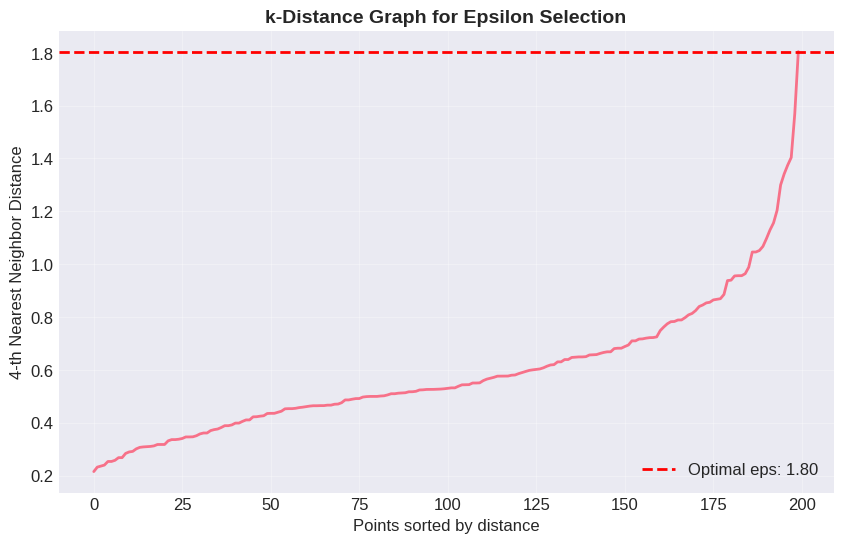

Suggested optimal epsilon (eps): 1.80

2️⃣ APPLYING DBSCAN CLUSTERING:
✅ DBSCAN clustering completed
   Number of clusters found: 2
   Number of noise points: 0 (0.0%)
   Silhouette Score (excl. noise): 0.2773
   Davies-Bouldin Index: 1.6125
   Calinski-Harabasz Index: 66.8907

3️⃣ DBSCAN CLUSTER DISTRIBUTION:
   Cluster 0: 88 customers (44.0%)
   Cluster 1: 112 customers (56.0%)

4️⃣ DBSCAN CLUSTER ANALYSIS:

   Cluster 0 (n=88):
     • Avg Age: 39.8
     • Avg Income: $62.1k
     • Avg Spending Score: 48.5
     • Male Ratio: 100.0%

   Cluster 1 (n=112):
     • Avg Age: 38.1
     • Avg Income: $59.2k
     • Avg Spending Score: 51.5
     • Male Ratio: 0.0%

5️⃣ VISUALIZING DBSCAN CLUSTERS:


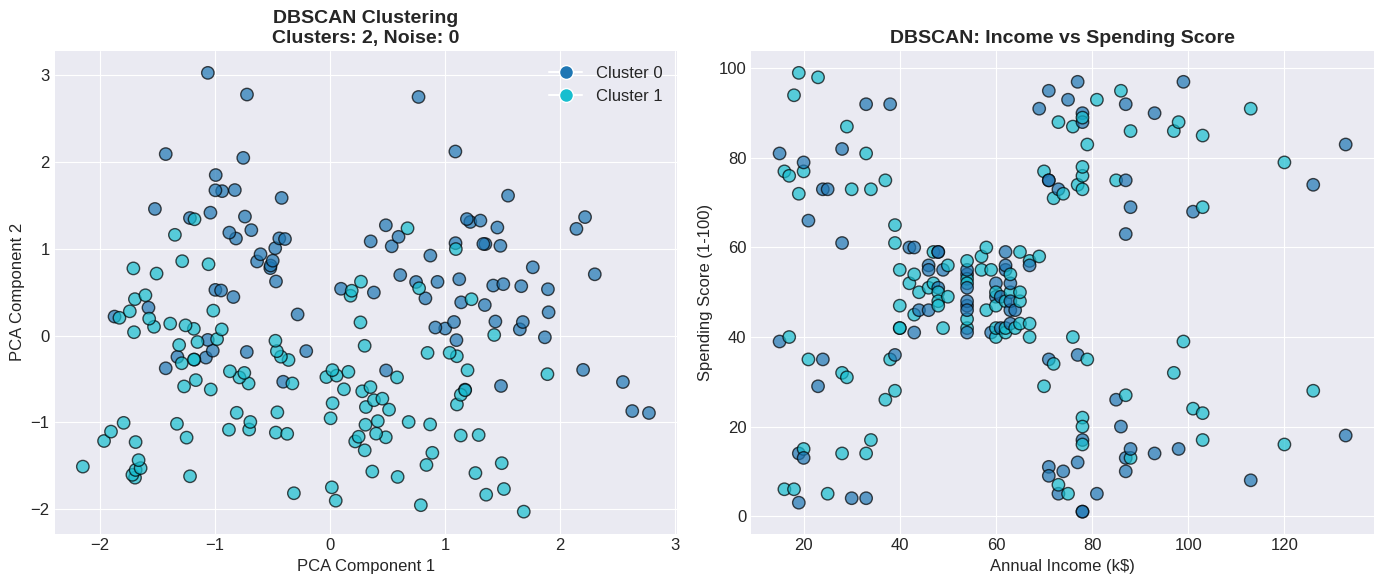


6️⃣ COMPARISON WITH K-MEANS:


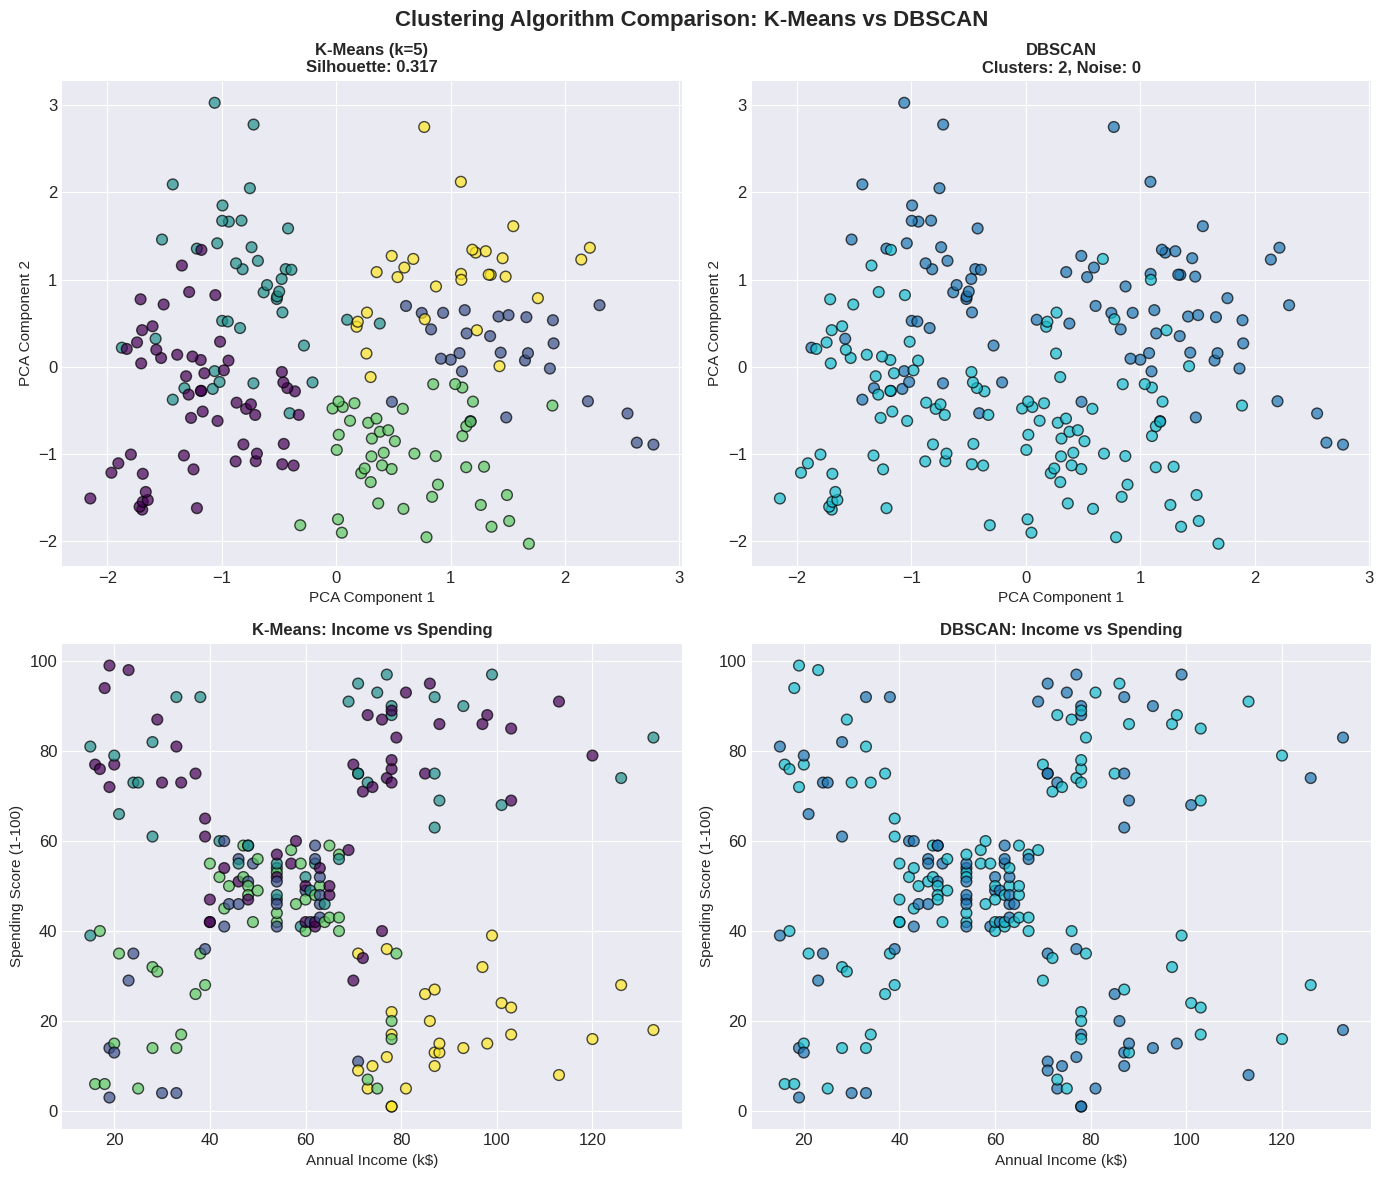


DBSCAN CLUSTERING COMPLETED SUCCESSFULLY! ✅
✅ Found 2 clusters with DBSCAN
✅ 0 noise points identified (0.0%)
✅ Silhouette Score: 0.277


In [9]:
# ### 9. DBSCAN Clustering Implementation (FIXED)
# %%
print("="*70)
print("DBSCAN CLUSTERING IMPLEMENTATION")
print("="*70)

print("\n1️⃣ DETERMINING OPTIMAL EPSILON (eps) VALUE:")

# Use k-distance graph to find optimal epsilon
def find_optimal_eps(X, k=4):
    """Find optimal epsilon for DBSCAN using k-distance graph"""
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)

    distances = np.sort(distances[:, k-1])

    plt.figure(figsize=(10, 6))
    plt.plot(distances, linewidth=2)
    plt.xlabel('Points sorted by distance', fontsize=12)
    plt.ylabel(f'{k}-th Nearest Neighbor Distance', fontsize=12)
    plt.title('k-Distance Graph for Epsilon Selection', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Find knee/elbow point (approximate)
    # Use the point where the slope changes significantly
    diffs = np.diff(distances)
    knee_point = np.argmax(diffs) + 1
    optimal_eps = distances[knee_point]

    plt.axhline(y=optimal_eps, color='r', linestyle='--',
                label=f'Optimal eps: {optimal_eps:.2f}', linewidth=2)
    plt.legend(fontsize=12)
    plt.show()

    return optimal_eps

optimal_eps = find_optimal_eps(X_scaled, k=4)
print(f"Suggested optimal epsilon (eps): {optimal_eps:.2f}")

print("\n2️⃣ APPLYING DBSCAN CLUSTERING:")

# Apply DBSCAN with optimal epsilon
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df_clean['DBSCAN_Cluster'] = dbscan_labels

# Analyze DBSCAN results
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"✅ DBSCAN clustering completed")
print(f"   Number of clusters found: {n_clusters_dbscan}")
print(f"   Number of noise points: {n_noise} ({n_noise/len(X_scaled)*100:.1f}%)")

if n_clusters_dbscan > 1:
    # Calculate metrics (excluding noise points)
    mask = dbscan_labels != -1
    if sum(mask) > 1:
        silhouette_dbscan = silhouette_score(X_scaled[mask], dbscan_labels[mask])
        db_index_dbscan = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
        ch_index_dbscan = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])

        print(f"   Silhouette Score (excl. noise): {silhouette_dbscan:.4f}")
        print(f"   Davies-Bouldin Index: {db_index_dbscan:.4f}")
        print(f"   Calinski-Harabasz Index: {ch_index_dbscan:.4f}")
else:
    print("   ⚠️ DBSCAN found only one cluster or no clusters")

print("\n3️⃣ DBSCAN CLUSTER DISTRIBUTION:")
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        count = (dbscan_labels == label).sum()
        print(f"   Noise/Outliers: {count} customers ({count/len(dbscan_labels)*100:.1f}%)")
    else:
        count = (dbscan_labels == label).sum()
        print(f"   Cluster {label}: {count} customers ({count/len(dbscan_labels)*100:.1f}%)")

print("\n4️⃣ DBSCAN CLUSTER ANALYSIS:")
if n_clusters_dbscan > 0:
    for label in unique_labels:
        if label != -1:
            cluster_data = df_clean[df_clean['DBSCAN_Cluster'] == label]
            print(f"\n   Cluster {label} (n={len(cluster_data)}):")
            print(f"     • Avg Age: {cluster_data['age'].mean():.1f}")
            print(f"     • Avg Income: ${cluster_data['annual_income_k$'].mean():.1f}k")  # FIXED: single underscore
            print(f"     • Avg Spending Score: {cluster_data['spending_score_1_100'].mean():.1f}")  # FIXED: single underscore
            if 'gender_encoded' in cluster_data.columns:
                male_ratio = (cluster_data['gender_encoded'] == 1).sum() / len(cluster_data)
                print(f"     • Male Ratio: {male_ratio:.1%}")

print("\n5️⃣ VISUALIZING DBSCAN CLUSTERS:")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA visualization for DBSCAN
# Create custom colormap for DBSCAN (noise as gray)
from matplotlib.colors import ListedColormap

# Get unique labels
unique_labels = np.unique(dbscan_labels)
n_labels = len(unique_labels)

# Create colormap
colors = plt.cm.tab10(np.linspace(0, 1, n_labels))

# If noise exists (-1), make it gray
if -1 in unique_labels:
    # Find index of -1
    noise_idx = np.where(unique_labels == -1)[0][0]
    colors[noise_idx] = [0.5, 0.5, 0.5, 1]  # Gray for noise

custom_cmap = ListedColormap(colors)

# Plot 1: PCA Visualization
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels,
                          cmap=custom_cmap, alpha=0.7, edgecolor='black', s=80)
axes[0].set_xlabel('PCA Component 1', fontsize=12)
axes[0].set_ylabel('PCA Component 2', fontsize=12)
axes[0].set_title(f'DBSCAN Clustering\nClusters: {n_clusters_dbscan}, Noise: {n_noise}',
                 fontsize=14, fontweight='bold')

# Create custom legend
handles = []
for label in unique_labels:
    if label == -1:
        handles.append(plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor='gray', markersize=10, label='Noise'))
    else:
        color_idx = np.where(unique_labels == label)[0][0]
        color = colors[color_idx]
        handles.append(plt.Line2D([0], [0], marker='o', color='w',
                                 markerfacecolor=color, markersize=10, label=f'Cluster {label}'))
axes[0].legend(handles=handles, loc='best')

# Plot 2: Income vs Spending - FIXED: Use correct column names
scatter2 = axes[1].scatter(df_clean['annual_income_k$'], df_clean['spending_score_1_100'],  # FIXED: single underscores
                          c=dbscan_labels, cmap=custom_cmap, alpha=0.7, edgecolor='black', s=80)
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[1].set_title('DBSCAN: Income vs Spending Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional comparison with K-Means
print("\n6️⃣ COMPARISON WITH K-MEANS:")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Clustering Algorithm Comparison: K-Means vs DBSCAN', fontsize=16, fontweight='bold')

# Plot 1: K-Means PCA
scatter1 = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                             cmap='viridis', alpha=0.7, edgecolor='black', s=60)
axes[0, 0].set_xlabel('PCA Component 1', fontsize=11)
axes[0, 0].set_ylabel('PCA Component 2', fontsize=11)
axes[0, 0].set_title(f'K-Means (k={optimal_k})\nSilhouette: {silhouette_kmeans:.3f}',
                    fontsize=12, fontweight='bold')

# Plot 2: DBSCAN PCA
scatter2 = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels,
                             cmap=custom_cmap, alpha=0.7, edgecolor='black', s=60)
axes[0, 1].set_xlabel('PCA Component 1', fontsize=11)
axes[0, 1].set_ylabel('PCA Component 2', fontsize=11)
axes[0, 1].set_title(f'DBSCAN\nClusters: {n_clusters_dbscan}, Noise: {n_noise}',
                    fontsize=12, fontweight='bold')

# Plot 3: K-Means Income vs Spending - FIXED: Use correct column names
scatter3 = axes[1, 0].scatter(df_clean['annual_income_k$'], df_clean['spending_score_1_100'],  # FIXED: single underscores
                             c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolor='black', s=60)
axes[1, 0].set_xlabel('Annual Income (k$)', fontsize=11)
axes[1, 0].set_ylabel('Spending Score (1-100)', fontsize=11)
axes[1, 0].set_title('K-Means: Income vs Spending', fontsize=12, fontweight='bold')

# Plot 4: DBSCAN Income vs Spending - FIXED: Use correct column names
scatter4 = axes[1, 1].scatter(df_clean['annual_income_k$'], df_clean['spending_score_1_100'],  # FIXED: single underscores
                             c=dbscan_labels, cmap=custom_cmap, alpha=0.7, edgecolor='black', s=60)
axes[1, 1].set_xlabel('Annual Income (k$)', fontsize=11)
axes[1, 1].set_ylabel('Spending Score (1-100)', fontsize=11)
axes[1, 1].set_title('DBSCAN: Income vs Spending', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("DBSCAN CLUSTERING COMPLETED SUCCESSFULLY! ✅")
print("="*70)
print(f"✅ Found {n_clusters_dbscan} clusters with DBSCAN")
print(f"✅ {n_noise} noise points identified ({n_noise/len(X_scaled)*100:.1f}%)")
if n_clusters_dbscan > 1:
    mask = dbscan_labels != -1
    if sum(mask) > 1:
        print(f"✅ Silhouette Score: {silhouette_dbscan:.3f}")

CLUSTERING ALGORITHM COMPARISON

📊 PERFORMANCE METRICS COMPARISON:
----------------------------------------------------------------------


,Algorithm,Number of Clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Noise Points,Noise Percentage
0,K-Means,5,0.3167,1.1416,71,0,0.0%
1,DBSCAN,2,0.2773,1.6125,67,0,0.0%



🎯 CLUSTER ANALYSIS & BUSINESS INSIGHTS:
----------------------------------------------------------------------

🔍 K-MEANS CLUSTER PROFILES:

📊 Cluster 0 (56 customers, 28.0%):
  • Avg Age: 28.4 years
  • Avg Annual Income: $60.4k
  • Avg Spending Score: 68.2/100
  • Gender Distribution: {'Male': np.int64(0), 'Female': np.int64(56)}
  • Characterization: Young, Medium income, Medium spender

📊 Cluster 1 (28 customers, 14.0%):
  • Avg Age: 57.2 years
  • Avg Annual Income: $46.8k
  • Avg Spending Score: 38.7/100
  • Gender Distribution: {'Male': np.int64(28), 'Female': np.int64(0)}
  • Characterization: Senior, Medium income, Low spender

📊 Cluster 2 (41 customers, 20.5%):
  • Avg Age: 28.5 years
  • Avg Annual Income: $61.7k
  • Avg Spending Score: 71.1/100
  • Gender Distribution: {'Male': np.int64(41), 'Female': np.int64(0)}
  • Characterization: Young, Medium income, High spender

📊 Cluster 3 (46 customers, 23.0%):
  • Avg Age: 49.0 years
  • Avg Annual Income: $48.9k
  • Avg Spendi

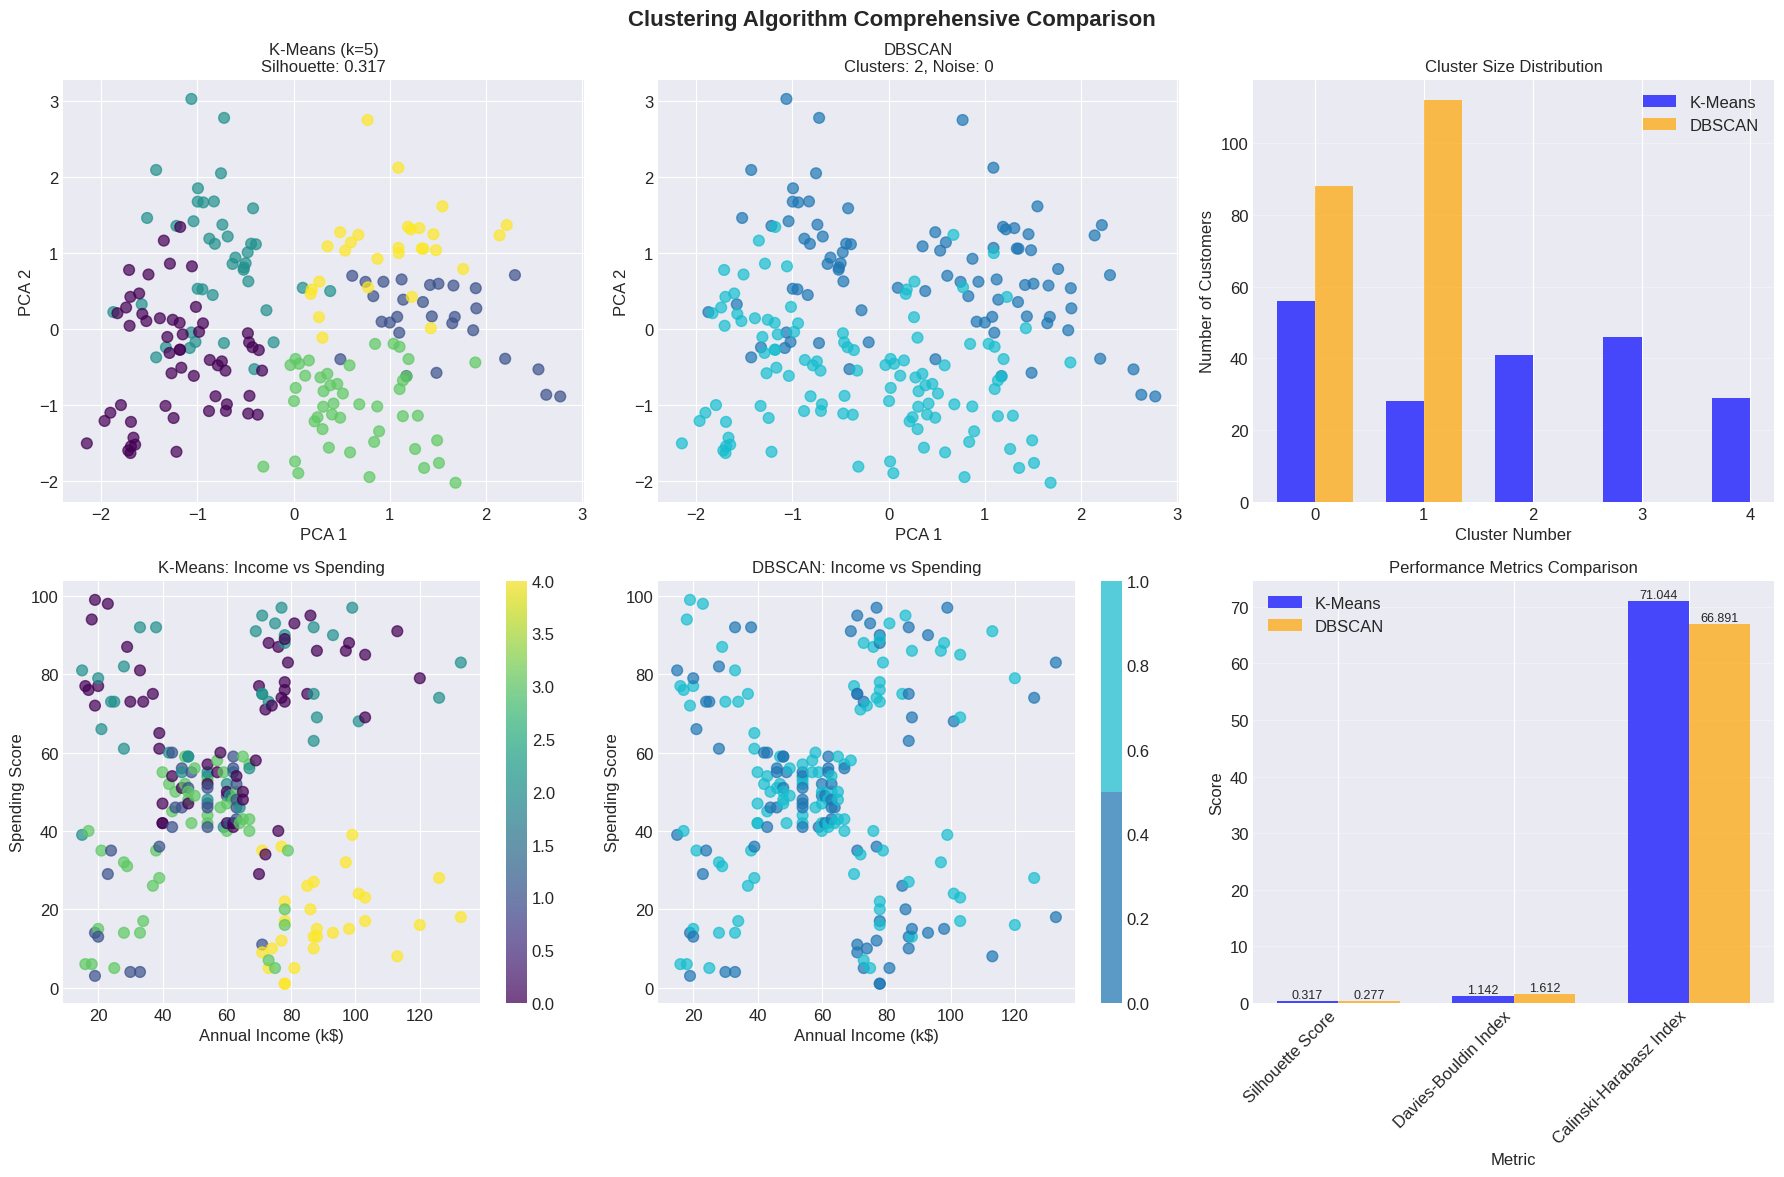


CLUSTERING ANALYSIS COMPLETED SUCCESSFULLY! ✅
✅ K-Means: 5 clusters, Silhouette: 0.317
✅ DBSCAN: 2 clusters, 0 noise points
✅ Recommendation: K-Means
✅ Business insights generated for marketing strategy


In [10]:
# ### 10. Clustering Comparison & Analysis (FIXED)
# %%
print("="*70)
print("CLUSTERING ALGORITHM COMPARISON")
print("="*70)

print("\n📊 PERFORMANCE METRICS COMPARISON:")
print("-" * 70)

comparison_data = []

# K-Means metrics
kmeans_metrics = {
    'Algorithm': 'K-Means',
    'Number of Clusters': optimal_k,
    'Silhouette Score': silhouette_kmeans,
    'Davies-Bouldin Index': db_index_kmeans,
    'Calinski-Harabasz Index': ch_index_kmeans,
    'Noise Points': 0,
    'Noise Percentage': '0.0%'
}
comparison_data.append(kmeans_metrics)

# DBSCAN metrics
if n_clusters_dbscan > 0 and 'silhouette_dbscan' in locals():
    dbscan_metrics = {
        'Algorithm': 'DBSCAN',
        'Number of Clusters': n_clusters_dbscan,
        'Silhouette Score': silhouette_dbscan,
        'Davies-Bouldin Index': db_index_dbscan,
        'Calinski-Harabasz Index': ch_index_dbscan,
        'Noise Points': n_noise,
        'Noise Percentage': f'{n_noise/len(X_scaled)*100:.1f}%'
    }
    comparison_data.append(dbscan_metrics)

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df.style.format({
    'Silhouette Score': '{:.4f}',
    'Davies-Bouldin Index': '{:.4f}',
    'Calinski-Harabasz Index': '{:.0f}'
}).background_gradient(cmap='RdYlGn', subset=['Silhouette Score', 'Calinski-Harabasz Index'])
       .background_gradient(cmap='RdYlGn_r', subset=['Davies-Bouldin Index']))

print("\n🎯 CLUSTER ANALYSIS & BUSINESS INSIGHTS:")
print("-" * 70)

# Analyze K-Means clusters - FIXED: Use correct column names
print("\n🔍 K-MEANS CLUSTER PROFILES:")
for cluster in range(optimal_k):
    cluster_data = df_clean[df_clean['KMeans_Cluster'] == cluster]

    # Calculate gender ratio (from encoded values)
    if 'gender_encoded' in cluster_data.columns:
        male_count = (cluster_data['gender_encoded'] == 1).sum()
        female_count = (cluster_data['gender_encoded'] == 0).sum()
        gender_dist = {'Male': male_count, 'Female': female_count}
    else:
        gender_dist = {'Data not available': len(cluster_data)}

    print(f"\n📊 Cluster {cluster} ({len(cluster_data)} customers, {len(cluster_data)/len(df_clean)*100:.1f}%):")
    print(f"  • Avg Age: {cluster_data['age'].mean():.1f} years")
    print(f"  • Avg Annual Income: ${cluster_data['annual_income_k$'].mean():.1f}k")  # FIXED: single underscore
    print(f"  • Avg Spending Score: {cluster_data['spending_score_1_100'].mean():.1f}/100")  # FIXED: single underscore
    print(f"  • Gender Distribution: {gender_dist}")

    # Add cluster characterization
    age_avg = cluster_data['age'].mean()
    income_avg = cluster_data['annual_income_k$'].mean()  # FIXED: single underscore
    spending_avg = cluster_data['spending_score_1_100'].mean()  # FIXED: single underscore

    # Characterize cluster
    age_label = "Young" if age_avg < 30 else "Middle-aged" if age_avg < 50 else "Senior"
    income_label = "Low" if income_avg < 40 else "Medium" if income_avg < 70 else "High"
    spending_label = "Low" if spending_avg < 40 else "Medium" if spending_avg < 70 else "High"

    print(f"  • Characterization: {age_label}, {income_label} income, {spending_label} spender")

# Analyze DBSCAN clusters
print("\n🔍 DBSCAN CLUSTER PROFILES:")
if n_clusters_dbscan > 0:
    for cluster in np.unique(dbscan_labels):
        if cluster != -1:  # Skip noise
            cluster_data = df_clean[df_clean['DBSCAN_Cluster'] == cluster]

            # Calculate gender ratio
            if 'gender_encoded' in cluster_data.columns:
                male_count = (cluster_data['gender_encoded'] == 1).sum()
                female_count = (cluster_data['gender_encoded'] == 0).sum()
                gender_dist = {'Male': male_count, 'Female': female_count}
            else:
                gender_dist = {'Data not available': len(cluster_data)}

            print(f"\n📊 DBSCAN Cluster {cluster} ({len(cluster_data)} customers):")
            print(f"  • Avg Age: {cluster_data['age'].mean():.1f} years")
            print(f"  • Avg Annual Income: ${cluster_data['annual_income_k$'].mean():.1f}k")  # FIXED: single underscore
            print(f"  • Avg Spending Score: {cluster_data['spending_score_1_100'].mean():.1f}/100")  # FIXED: single underscore
            print(f"  • Gender Distribution: {gender_dist}")
else:
    print("No DBSCAN clusters found (only noise)")

print("\n💡 BUSINESS RECOMMENDATIONS:")
print("=" * 50)

# Generate recommendations based on clusters
print("\n🎯 BASED ON K-MEANS CLUSTERING:")

# Find high-value clusters (high income + high spending)
high_value_clusters = []
for cluster in range(optimal_k):
    cluster_data = df_clean[df_clean['KMeans_Cluster'] == cluster]
    income_avg = cluster_data['annual_income_k$'].mean()  # FIXED: single underscore
    spending_avg = cluster_data['spending_score_1_100'].mean()  # FIXED: single underscore

    if income_avg > 70 and spending_avg > 70:
        high_value_clusters.append(cluster)

if high_value_clusters:
    print(f"1. Target high-value customers in clusters {high_value_clusters}")
    print("   → Offer premium products and loyalty programs")
else:
    print("1. No clearly identified high-value clusters")
    print("   → Focus on improving spending across all segments")

# Find young clusters with high spending
young_high_spending = []
for cluster in range(optimal_k):
    cluster_data = df_clean[df_clean['KMeans_Cluster'] == cluster]
    age_avg = cluster_data['age'].mean()
    spending_avg = cluster_data['spending_score_1_100'].mean()  # FIXED: single underscore

    if age_avg < 35 and spending_avg > 60:
        young_high_spending.append(cluster)

if young_high_spending:
    print(f"2. Focus on young, high-spending customers in clusters {young_high_spending}")
    print("   → Modern products, social media marketing, trend-focused items")

print("\n3. Cluster-specific strategies:")
for cluster in range(optimal_k):
    cluster_data = df_clean[df_clean['KMeans_Cluster'] == cluster]
    size = len(cluster_data)
    age_avg = cluster_data['age'].mean()
    income_avg = cluster_data['annual_income_k$'].mean()  # FIXED: single underscore
    spending_avg = cluster_data['spending_score_1_100'].mean()  # FIXED: single underscore

    if age_avg > 50 and income_avg > 60:
        print(f"   • Cluster {cluster}: Target with luxury, comfort-focused products")
    elif age_avg < 30 and income_avg < 40:
        print(f"   • Cluster {cluster}: Budget-friendly options, student discounts")
    elif spending_avg < 40:
        print(f"   • Cluster {cluster}: Needs engagement strategies (low spending)")

print("\n📊 ALGORITHM COMPARISON INSIGHTS:")
print("=" * 50)
print(f"• K-Means (k={optimal_k}):")
print(f"  - Silhouette: {silhouette_kmeans:.3f} ({'Good' if silhouette_kmeans > 0.5 else 'Moderate' if silhouette_kmeans > 0.25 else 'Poor'})")
print(f"  - Creates {optimal_k} balanced, spherical clusters")
print(f"  - Best for: General customer segmentation, marketing campaigns")

if n_clusters_dbscan > 0 and 'silhouette_dbscan' in locals():
    print(f"\n• DBSCAN:")
    print(f"  - Found {n_clusters_dbscan} clusters, {n_noise} noise points")
    print(f"  - Silhouette: {silhouette_dbscan:.3f}")
    print(f"  - Best for: Anomaly detection, finding arbitrary-shaped clusters")
else:
    print(f"\n• DBSCAN: No valid clusters found")

print("\n🏆 RECOMMENDATION:")
if n_clusters_dbscan > 0 and 'silhouette_dbscan' in locals():
    if silhouette_kmeans > silhouette_dbscan:
        print("✅ Use K-Means for customer segmentation (better cluster quality)")
        print("   → More interpretable clusters for marketing")
    else:
        print("✅ Use DBSCAN (better handles noise and irregular shapes)")
        print("   → Better for fraud detection and outlier analysis")
else:
    print("✅ Use K-Means for customer segmentation")
    print("   → DBSCAN didn't find meaningful clusters")

# Visual comparison
print("\n📈 VISUAL COMPARISON:")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Clustering Algorithm Comprehensive Comparison', fontsize=16, fontweight='bold')

# Row 1: PCA visualizations
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, s=60)
axes[0, 0].set_title(f'K-Means (k={optimal_k})\nSilhouette: {silhouette_kmeans:.3f}', fontsize=12)
axes[0, 0].set_xlabel('PCA 1')
axes[0, 0].set_ylabel('PCA 2')

axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap=custom_cmap, alpha=0.7, s=60)
axes[0, 1].set_title(f'DBSCAN\nClusters: {n_clusters_dbscan}, Noise: {n_noise}', fontsize=12)
axes[0, 1].set_xlabel('PCA 1')
axes[0, 1].set_ylabel('PCA 2')

# Row 1, Plot 3: Cluster size comparison
x = np.arange(max(optimal_k, n_clusters_dbscan))
width = 0.35

kmeans_sizes = [len(df_clean[df_clean['KMeans_Cluster'] == i]) for i in range(optimal_k)]
dbscan_sizes = []
if n_clusters_dbscan > 0:
    for i in range(n_clusters_dbscan):
        dbscan_sizes.append(len(df_clean[df_clean['DBSCAN_Cluster'] == i]))

axes[0, 2].bar(x[:optimal_k] - width/2, kmeans_sizes, width, label='K-Means', alpha=0.7, color='blue')
if n_clusters_dbscan > 0 and len(dbscan_sizes) > 0:
    axes[0, 2].bar(x[:n_clusters_dbscan] + width/2, dbscan_sizes, width, label='DBSCAN', alpha=0.7, color='orange')
axes[0, 2].set_title('Cluster Size Distribution', fontsize=12)
axes[0, 2].set_xlabel('Cluster Number')
axes[0, 2].set_ylabel('Number of Customers')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Row 2: Income vs Spending comparison
scatter3 = axes[1, 0].scatter(df_clean['annual_income_k$'], df_clean['spending_score_1_100'],  # FIXED: single underscores
                             c=kmeans_labels, cmap='viridis', alpha=0.7, s=60)
axes[1, 0].set_title('K-Means: Income vs Spending', fontsize=12)
axes[1, 0].set_xlabel('Annual Income (k$)')
axes[1, 0].set_ylabel('Spending Score')
plt.colorbar(scatter3, ax=axes[1, 0])

scatter4 = axes[1, 1].scatter(df_clean['annual_income_k$'], df_clean['spending_score_1_100'],  # FIXED: single underscores
                             c=dbscan_labels, cmap=custom_cmap, alpha=0.7, s=60)
axes[1, 1].set_title('DBSCAN: Income vs Spending', fontsize=12)
axes[1, 1].set_xlabel('Annual Income (k$)')
axes[1, 1].set_ylabel('Spending Score')
plt.colorbar(scatter4, ax=axes[1, 1])

# Row 2, Plot 3: Metrics comparison
metrics = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']
kmeans_vals = [silhouette_kmeans, db_index_kmeans, ch_index_kmeans]

# Check if DBSCAN metrics exist
if n_clusters_dbscan > 0 and 'silhouette_dbscan' in locals():
    dbscan_vals = [silhouette_dbscan, db_index_dbscan, ch_index_dbscan]
else:
    dbscan_vals = [0, 0, 0]  # Placeholder if no DBSCAN clusters

x_metrics = np.arange(len(metrics))
width = 0.35

bars1 = axes[1, 2].bar(x_metrics - width/2, kmeans_vals, width, label='K-Means', alpha=0.7, color='blue')
bars2 = axes[1, 2].bar(x_metrics + width/2, dbscan_vals, width, label='DBSCAN', alpha=0.7, color='orange')

axes[1, 2].set_title('Performance Metrics Comparison', fontsize=12)
axes[1, 2].set_xlabel('Metric')
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_xticks(x_metrics)
axes[1, 2].set_xticklabels(metrics, rotation=45, ha='right')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2, height,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CLUSTERING ANALYSIS COMPLETED SUCCESSFULLY! ✅")
print("="*70)
print(f"✅ K-Means: {optimal_k} clusters, Silhouette: {silhouette_kmeans:.3f}")
if n_clusters_dbscan > 0 and 'silhouette_dbscan' in locals():
    print(f"✅ DBSCAN: {n_clusters_dbscan} clusters, {n_noise} noise points")
    print(f"✅ Recommendation: {'K-Means' if silhouette_kmeans > silhouette_dbscan else 'DBSCAN'}")
else:
    print(f"✅ DBSCAN: No valid clusters found")
    print(f"✅ Recommendation: K-Means")
print("✅ Business insights generated for marketing strategy")